In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [2]:
#read the data
ev_df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
city_df = pd.read_csv("us_cities.csv")

In [3]:
ev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
city_df.head()

,Unnamed: 0,City,State,Region,Size,Population,AvgRent,MedianRent,UnempRate,AvgIncome,CostOfLiving,PriceParity,CommuteTime,MedianAQI,WalkScore,BikeScore,TransitScore,Latitude,Longitude
0,0,New York,New York,Northeast,Large,20140470.0,3272,2323.0,3.8,85136.0,128.0,114.58,36.7,50.0,88.0,69.3,6.9,40.6943,-73.9249
1,1,Los Angeles,California,West,Large,13200998.0,2857,1925.0,3.9,75821.0,140.6,113.82,30.7,70.0,68.6,58.7,6.2,34.1141,-118.4068
2,2,Chicago,Illinois,Midwest,Large,9618502.0,1975,1364.0,4.2,71992.0,100.1,105.42,31.8,50.0,77.2,72.2,5.1,41.8375,-87.6866
3,3,Dallas,Texas,South,Large,7637387.0,1754,1440.0,3.2,66727.0,98.5,103.85,28.6,51.0,46.0,49.3,2.8,32.7935,-96.7667
4,4,Houston,Texas,South,Large,7122240.0,1620,1216.0,3.9,64837.0,95.8,99.74,30.0,57.0,47.5,48.6,2.8,29.7860,-95.3885


In [5]:
#extract data and drop missing values
city_dropna=city_df.dropna()

city_new = city_dropna[['City','AvgIncome']]

city_reset = city_new.reset_index(drop=True)
city_reset

,City,AvgIncome
0,New York,85136.0
1,Los Angeles,75821.0
2,Chicago,71992.0
3,Dallas,66727.0
4,Houston,64837.0
...,...,...
68,Anchorage,67085.0
69,Montgomery,49310.0
70,Lincoln,56887.0
71,Lubbock,51045.0


In [6]:
#extract data
electric_cars_count = ev_df.groupby('City').size().reset_index(name='Count')
electric_cars_count

,City,Count
0,Aberdeen,130
1,Acme,7
2,Addy,2
3,Airway Heights,22
4,Alameda,1
...,...,...
678,Yacolt,37
679,Yakima,552
680,Yarrow Point,134
681,Yelm,220


In [7]:
#Merge data
result_df = pd.merge(city_reset, electric_cars_count, on='City')
result_df.describe()

,AvgIncome,Count
count,33.000000,33.000000
mean,65032.878788,863.878788
std,16308.052361,4470.833429
min,44058.000000,1.000000
25%,56343.000000,1.000000
50%,61833.000000,3.000000
75%,71912.000000,5.000000
max,136338.000000,25675.000000


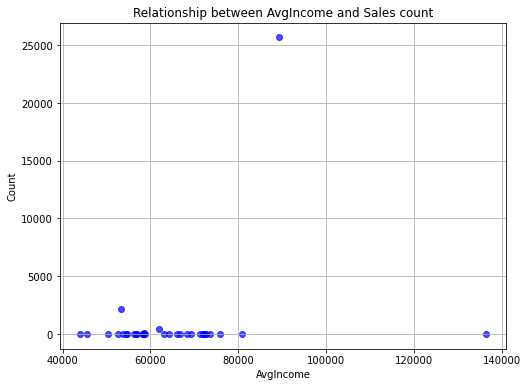

Correlation Coefficient between AvgIncome and count: 0.2547912758506621


In [8]:
#simply check correlation
correlation = result_df['AvgIncome'].corr(result_df['Count'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(result_df['AvgIncome'], result_df['Count'], color='blue', alpha=0.7)
plt.title('Relationship between AvgIncome and Sales count')
plt.xlabel('AvgIncome')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f'Correlation Coefficient between AvgIncome and count: {correlation}')

In [9]:
# Define the independent variable (X) and the dependent variable (y)
X = result_df['AvgIncome']
X = sm.add_constant(X)  # Add a constant term to the independent variable
y = result_df['Count']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.152
Date:                Thu, 14 Dec 2023   Prob (F-statistic):              0.152
Time:                        16:38:14   Log-Likelihood:                -322.59
No. Observations:                  33   AIC:                             649.2
Df Residuals:                      31   BIC:                             652.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3678.7152   3189.455     -1.153      0.2

Test 2

In [10]:
# read data
county_df = pd.read_excel("median_household_income_estimates.xlsx",header=3)

In [11]:
#drop missing values
county_dropna=county_df.dropna()
county_dropna['County'] = county_dropna['Unnamed: 0']
county_dropna['AvgIncome'] = county_dropna[2022]

#extract data
county_new = county_dropna[['County','AvgIncome']]
county_new = county_new.drop(1)
county_reset = county_new.reset_index(drop=True)
county_reset

C:\Users\93505\AppData\Local\Temp\ipykernel_35568\3964084063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_dropna['County'] = county_dropna['Unnamed: 0']
C:\Users\93505\AppData\Local\Temp\ipykernel_35568\3964084063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_dropna['AvgIncome'] = county_dropna[2022]


,County,AvgIncome
0,Adams,58406.161270
1,Asotin,59674.538547
2,Benton,78823.975660
3,Chelan,68015.630585
4,Clallam,65652.257946
5,Clark,87397.382557
6,Columbia,61115.123669
7,Cowlitz,76364.199947
8,Douglas,65096.415267
9,Ferry,53577.369452


In [12]:
#extract data
electric_cars_count2 = ev_df.groupby('County').size().reset_index(name='Count')
electric_cars_count2

,County,Count
0,Adams,42
1,Alameda,4
2,Alexandria,3
3,Allen,1
4,Anchorage,1
...,...,...
178,Williamson,1
179,Wilson,1
180,Yakima,835
181,Yavapai,1


In [13]:
#merge data
result_df2 = pd.merge(county_reset, electric_cars_count2, on='County', how='left')
result_df2.describe()

,AvgIncome,Count
count,39.000000,39.000000
mean,70985.804163,3850.128205
std,14122.568903,12857.301979
min,52988.946375,3.000000
25%,62177.969324,185.000000
50%,67315.852699,533.000000
75%,77215.047844,1649.000000
max,118664.424099,79075.000000


In [14]:
# Define the independent variable (X) and the dependent variable (y)
X = result_df2['AvgIncome']
X = sm.add_constant(X)  # Add a constant term to the independent variable
y = result_df2['Count']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     37.93
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           3.83e-07
Time:                        16:38:15   Log-Likelihood:                -410.08
No. Observations:                  39   AIC:                             824.2
Df Residuals:                      37   BIC:                             827.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.213e+04   7608.376     -5.537      0.0

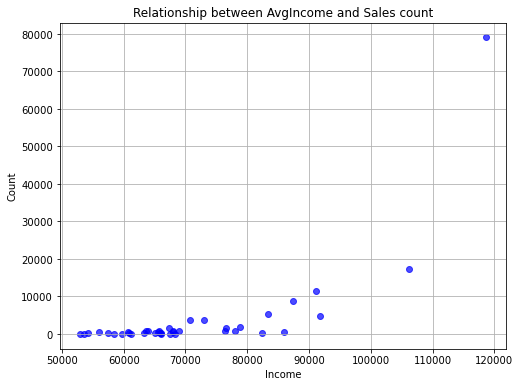

Pearson Correlation Coefficient: 0.7114891016529898
P-Value: 3.8271469078415625e-07


In [15]:
#linear relationship check
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(result_df2['AvgIncome'], result_df2['Count'], color='blue', alpha=0.7)
plt.title('Relationship between AvgIncome and Sales count')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Pearson Correlation
x = result_df2['AvgIncome']
y = result_df2['Count']

correlation_coefficient, p_value = stats.pearsonr(x, y)

# Print results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

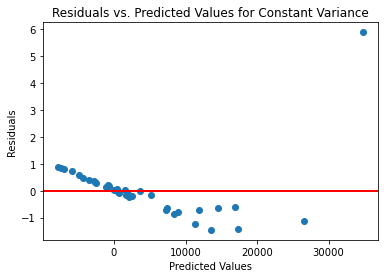

In [16]:
#check Constant variance assumption
# Predict the target values on the test set
y_pred = model.predict(X)

# Calculate residuals
standardized_residuals = model.get_influence().resid_studentized_internal

# Create a scatterplot of residuals versus predicted values
plt.scatter(y_pred, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Constant Variance')
plt.show()

In [17]:
#Check independence
durbin_watson_statistic = sm.stats.stattools.durbin_watson(standardized_residuals)

# Display Durbin-Watson Statistic
print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

# Interpret the Result
if durbin_watson_statistic < 1.5:
    print('Positive Autocorrelation')
elif durbin_watson_statistic > 2.5:
    print('Negative Autocorrelation')
else:
    print('No Autocorrelation')

Durbin-Watson Statistic: 2.3460885035185903
No Autocorrelation


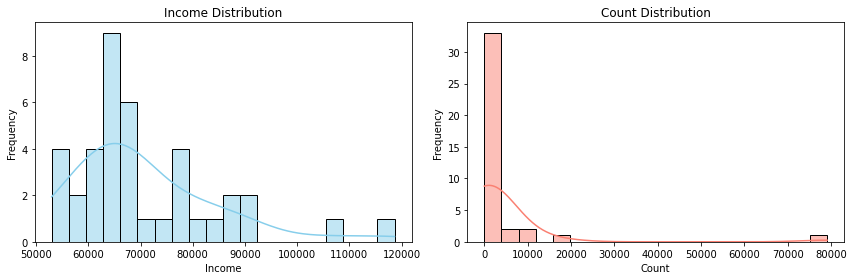

In [18]:
#normal distribution check 
# plots of the data distributions
plt.figure(figsize=(12, 4))

# Histogram for Sales
plt.subplot(1, 2, 1)
sns.histplot(result_df2['AvgIncome'], bins=20, color='skyblue', edgecolor='black',kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Histogram for Temperature
plt.subplot(1, 2, 2)
sns.histplot(result_df2['Count'], bins=20, color='salmon', edgecolor='black',kde=True)
plt.title('Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
# fix the problem that the data is not Constant variance and normal ditribution
log_transformed_data = np.log(result_df2[['AvgIncome','Count']])

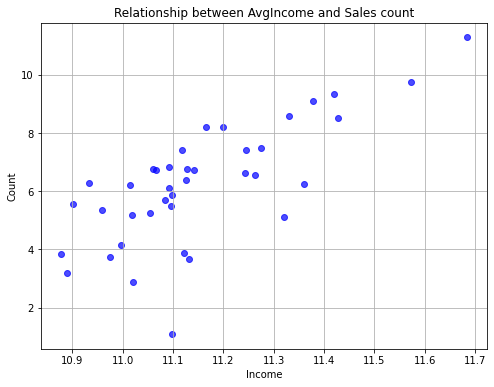

Pearson Correlation Coefficient: 0.7371161888034512
P-Value: 8.727898426083468e-08


In [20]:
#linear relationship check
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(log_transformed_data['AvgIncome'], log_transformed_data['Count'], color='blue', alpha=0.7)
plt.title('Relationship between AvgIncome and Sales count')
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Pearson Correlation
x = log_transformed_data['AvgIncome']
y = log_transformed_data['Count']

correlation_coefficient, p_value = stats.pearsonr(x, y)

# Print results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

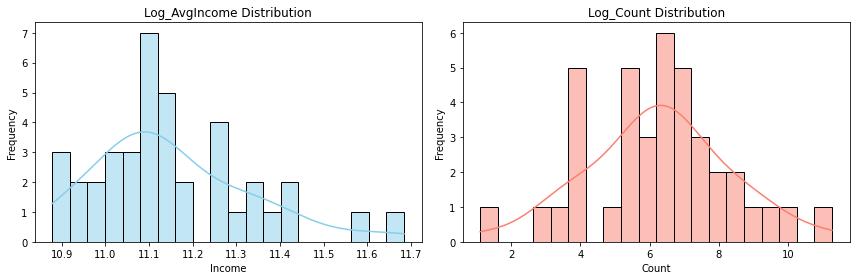

In [21]:
# plots of the data distributions
plt.figure(figsize=(12, 4))

# Histogram for Sales
plt.subplot(1, 2, 1)
sns.histplot(log_transformed_data['AvgIncome'], bins=20, color='skyblue', edgecolor='black',kde=True)
plt.title('Log_AvgIncome Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Histogram for Temperature
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data['Count'], bins=20, color='salmon', edgecolor='black',kde=True)
plt.title('Log_Count Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

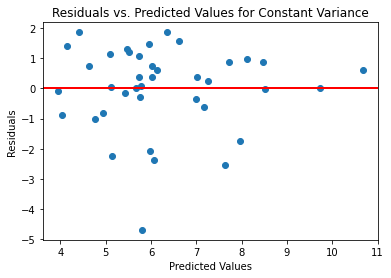

In [22]:
#check Constant variance assumption again
X = log_transformed_data['AvgIncome']
X = sm.add_constant(X)  # Add a constant term to the independent variable
y = log_transformed_data['Count']

model = LinearRegression()
model.fit(X, y)

# Predict the target values on the test set
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Create a scatterplot of residuals versus predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-', linewidth=2)  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Constant Variance')
plt.show()

In [23]:
#Test after log_transforamtion
# Define the independent variable (X) and the dependent variable (y)
X = log_transformed_data['AvgIncome']
X = sm.add_constant(X)  # Add a constant term to the independent variable
y = log_transformed_data['Count']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     44.02
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           8.73e-08
Time:                        16:38:16   Log-Likelihood:                -67.708
No. Observations:                  39   AIC:                             139.4
Df Residuals:                      37   BIC:                             142.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -86.6777     14.007     -6.188      0.0